# Clustering

Dataset: NYC Property Sales

Clustering Method: K-Means

indo tutorial by indosoai https://www.youtube.com/watch?v=1jzvGdIB9bo

In [0]:
!pip install kaggle
from google.colab import files
files.upload()
import pandas as pd

Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d new-york-city/nyc-property-sales

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 123MB/s]


In [0]:
!unzip nyc-property-sales.zip

Archive:  nyc-property-sales.zip
  inflating: nyc-rolling-sales.csv   


In [0]:
data = pd.read_csv('nyc-rolling-sales.csv')

In [0]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [0]:
ds = data[['TOTAL UNITS','BLOCK','SALE PRICE','YEAR BUILT','LOT','ZIP CODE']] #kolom data yang akan digunakan

In [0]:
ds.head()

,TOTAL UNITS,BLOCK,SALE PRICE,YEAR BUILT,LOT,ZIP CODE
0,5,392,6625000,1900,6,10009
1,31,399,-,1900,26,10009
2,17,399,-,1900,39,10009
3,10,402,3936272,1913,21,10009
4,6,404,8000000,1900,55,10009


In [0]:
#check data kosong
ds.isna().sum()

TOTAL UNITS    0
BLOCK          0
SALE PRICE     0
YEAR BUILT     0
LOT            0
ZIP CODE       0
dtype: int64

In [0]:
ds['YEAR BUILT'].describe()
#len(ds) #cek brp data yang ada

count    84548.000000
mean      1789.322976
std        537.344993
min          0.000000
25%       1920.000000
50%       1940.000000
75%       1965.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

In [0]:
ds2 = ds[ds['YEAR BUILT'] > 1965 ]

In [0]:
len(ds),len(ds2)

(84548, 21088)

In [0]:
ds2.head()

,TOTAL UNITS,BLOCK,SALE PRICE,YEAR BUILT,LOT,ZIP CODE
11,10,400,10350000,2009,21,10009
73,47,385,28000000,2005,1102,10009
75,132,397,52625000,1989,1301,10002
88,1,378,-,2014,1001,10009
89,1,378,-,2014,1002,10009


In [0]:
from sklearn import preprocessing

In [0]:
#convert all value to decimal number
minmax = preprocessing.MinMaxScaler().fit_transform(ds2.drop('SALE PRICE',axis=1))

In [0]:
minmax

array([[5.35905681e-03, 2.44650193e-02, 8.43137255e-01, 2.22197534e-03,
        8.55909013e-01],
       [2.51875670e-02, 2.35452817e-02, 7.64705882e-01, 1.22319742e-01,
        8.55909013e-01],
       [7.07395498e-02, 2.42810718e-02, 4.50980392e-01, 1.44428397e-01,
        8.55310416e-01],
       ...,
       [1.07181136e-03, 4.50548777e-01, 6.27450980e-01, 8.55460504e-03,
        8.81563195e-01],
       [3.75133976e-03, 4.35281133e-01, 6.86274510e-01, 2.99966670e-03,
        8.81563195e-01],
       [5.35905681e-04, 4.35587712e-01, 7.84313725e-01, 7.53249639e-02,
        8.81563195e-01]])

In [0]:
#convert numpy to pandas
ds3 = pd.DataFrame(minmax, index=ds2.index, columns=ds2.columns[:-1])

In [0]:
ds3

,TOTAL UNITS,BLOCK,SALE PRICE,YEAR BUILT,LOT
11,0.005359,0.024465,0.843137,0.002222,0.855909
73,0.025188,0.023545,0.764706,0.122320,0.855909
75,0.070740,0.024281,0.450980,0.144428,0.855310
88,0.000536,0.023116,0.941176,0.111099,0.855909
89,0.000536,0.023116,0.941176,0.111210,0.855909
...,...,...,...,...,...
84542,0.001072,0.449936,0.607843,0.004444,0.881563
84543,0.001072,0.450549,0.627451,0.003666,0.881563
84544,0.001072,0.450549,0.627451,0.008555,0.881563
84546,0.003751,0.435281,0.686275,0.003000,0.881563


In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [0]:
#how to know cluster?
scr=[]
for i in range(1,20):
  score=KMeans(n_clusters=i).fit(ds3).score(ds3)
  print(score)
  scr.append(score)

-2995.209885603463
-1400.055934031756
-1028.1970641360722
-839.8515369393963
-706.0146554352721
-590.1176381640505
-517.9355442979469
-465.5155749906395
-424.5967133655029
-393.97771653308234
-367.63329437642733
-336.24683997242056
-319.51113970873683
-300.0815583833316
-279.99127713766904
-272.1286382634699
-257.68765468152384
-247.11226103851786
-236.2080208940488


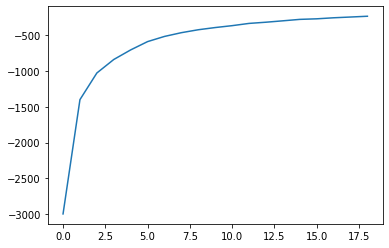

In [0]:
#see distribution efficient or not with mathplotlib
plt.plot(scr)

In [0]:
#from diagram we know 2.5 is the best cluster
km = KMeans(n_clusters=3)
#kenapa dipke 3? krn sblmnya nyoba 2.5 dibilang float can't be convert to integer. maunya yg bilangan pas aja si doi :"
#jadi dipke yang paling deket dengan 2.5
km.fit(ds3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
km.labels_

array([0, 0, 1, ..., 2, 2, 2], dtype=int32)

In [0]:
ds3['cluster'] = km.labels_ #adding column cluster

In [0]:
ds3

,TOTAL UNITS,BLOCK,SALE PRICE,YEAR BUILT,LOT,cluster
11,0.005359,0.024465,0.843137,0.002222,0.855909,0
73,0.025188,0.023545,0.764706,0.122320,0.855909,0
75,0.070740,0.024281,0.450980,0.144428,0.855310,1
88,0.000536,0.023116,0.941176,0.111099,0.855909,0
89,0.000536,0.023116,0.941176,0.111210,0.855909,0
...,...,...,...,...,...,...
84542,0.001072,0.449936,0.607843,0.004444,0.881563,2
84543,0.001072,0.450549,0.627451,0.003666,0.881563,2
84544,0.001072,0.450549,0.627451,0.008555,0.881563,2
84546,0.003751,0.435281,0.686275,0.003000,0.881563,2


(array([10093.,     0.,     0.,     0.,     0.,  7882.,     0.,     0.,
            0.,  3113.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

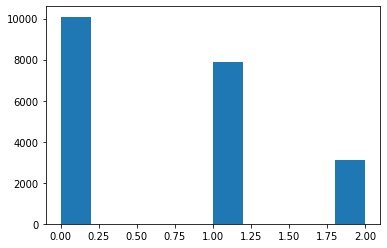

In [0]:
#see cluster in histogram
plt.hist(ds3['cluster'])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


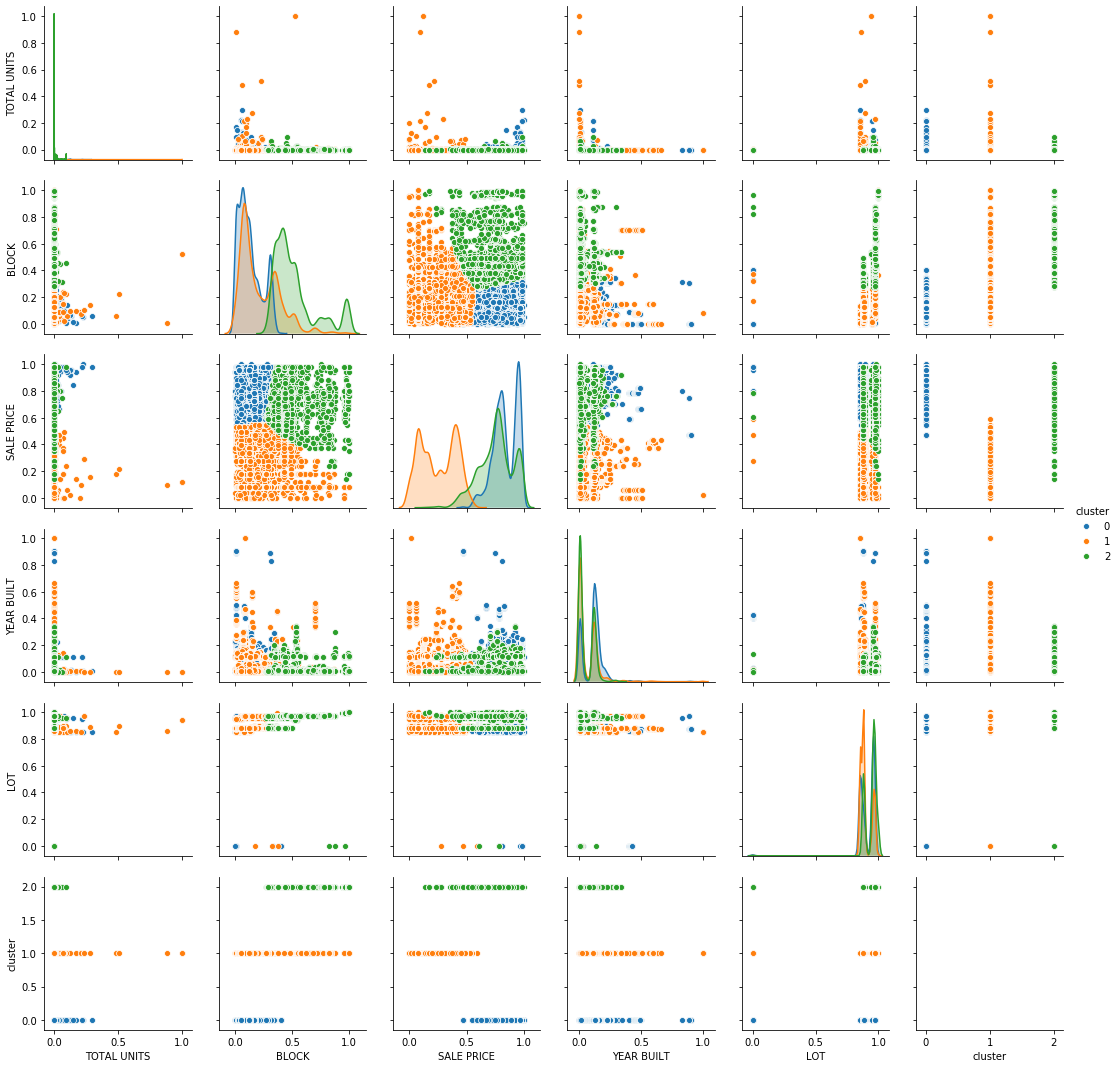

In [0]:
import seaborn as sns
sns.pairplot(ds3,hue='cluster')

In [0]:
ds3

,TOTAL UNITS,BLOCK,SALE PRICE,YEAR BUILT,LOT,cluster
11,0.005359,0.024465,0.843137,0.002222,0.855909,0
73,0.025188,0.023545,0.764706,0.122320,0.855909,0
75,0.070740,0.024281,0.450980,0.144428,0.855310,1
88,0.000536,0.023116,0.941176,0.111099,0.855909,0
89,0.000536,0.023116,0.941176,0.111210,0.855909,0
...,...,...,...,...,...,...
84542,0.001072,0.449936,0.607843,0.004444,0.881563,2
84543,0.001072,0.450549,0.627451,0.003666,0.881563,2
84544,0.001072,0.450549,0.627451,0.008555,0.881563,2
84546,0.003751,0.435281,0.686275,0.003000,0.881563,2


In [0]:
ds3['SALE PRICE'] = ds2['SALE PRICE']
ds3

,TOTAL UNITS,BLOCK,SALE PRICE,YEAR BUILT,LOT,cluster
11,0.005359,0.024465,10350000,0.002222,0.855909,0
73,0.025188,0.023545,28000000,0.122320,0.855909,0
75,0.070740,0.024281,52625000,0.144428,0.855310,1
88,0.000536,0.023116,-,0.111099,0.855909,0
89,0.000536,0.023116,-,0.111210,0.855909,0
...,...,...,...,...,...,...
84542,0.001072,0.449936,-,0.004444,0.881563,2
84543,0.001072,0.450549,450000,0.003666,0.881563,2
84544,0.001072,0.450549,550000,0.008555,0.881563,2
84546,0.003751,0.435281,11693337,0.003000,0.881563,2
